# Fine tuning Methods:
### Additonal Trianing :
- training a base model with an additional dataset.
### Dreamboot :
- developed by google ,a  technique for injecting custom subjects into model, DUe to its architecture , it is possible to achieve great results using only 3/5 custom images

### Textual inevrsion :
 - it injects a custom subject into the model wiht just few examples, all traning is done only in the embedding neural network.

# Dreambooth
- method to fine tune text to image models like stable diffusion.
- It solves two problems when inseting the object into the model : overfitting(as dataset is too small) and langauge drift.
- Using the rare words
- Preservation of the class: to preserve the meaningo of the class , the model is adjusted ins uch a way that the subject is injected while the generation of the class image is preserved.
## It requires 3  cthings for training:
- 1 Unique Identifier
- 2 Class name
- 3 Images of the subject to be inserted
## In our Implementation we are going to using the face of a person , class is person


In [1]:
!wget -q https://github.com/ShivamShrirao/diffusers/raw/main/examples/dreambooth/train_dreambooth.py

In [2]:
!wget -q https://github.com/ShivamShrirao/diffusers/raw/main/scripts/convert_diffusers_to_original_stable_diffusion.py

In [3]:
! pip install -qq git+https://github.com/ShivamShrirao/diffusers

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [4]:
! pip install -q -U -pre triton


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -p


In [5]:
! pip install -q accelerate transformers ftfy bitsandbytes gradio natsort safetensors xformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 MB 9.9 MB/s eta 0:00:00


In [6]:
model_sd = "runyaml/stable-diffusion-v1-5"

In [7]:
output_dir ="/content/stable_diffusion_weights/zwx"

In [8]:
! mkdir -p $output_dir

In [9]:
! unzip /content/stable_diffusion_weights/zwx/dataset_dave-20250917T185257Z-1-001.zip

Archive:  /content/stable_diffusion_weights/zwx/dataset_dave-20250917T185257Z-1-001.zip
  inflating: dataset_dave/dave_09.jpg  
  inflating: dataset_dave/dave_06.jpg  
  inflating: dataset_dave/dave_08.jpg  
  inflating: dataset_dave/dave_02.jpg  
  inflating: dataset_dave/dave_04.jpg  
  inflating: dataset_dave/dave_10.jpg  
  inflating: dataset_dave/dave_07.jpg  
  inflating: dataset_dave/dave_03.jpg  
  inflating: dataset_dave/dave_01.jpg  
  inflating: dataset_dave/dave_05.jpg  


# Training :
1) unique Identifier
2) Class Name
3) Images
- class prompt: photo of [class name]
- instance prompt will be a zwx person

# Directories

In [10]:
concepts_list = [{
    "instance_prompt":     "photo of zwx",
    "class_prompt":        "photo of a person",
    "instance_data_dir":   "/content/dataset_dave",
    "class_data_dir":      "/content/dataset_dave"}
]

In [11]:
import json
import os
import random

In [12]:
for c in concepts_list:
  os.makedirs(c["instance_data_dir"], exist_ok=True)
  os.makedirs(c["class_data_dir"], exist_ok=True)

In [13]:
with open("concepts_list.json", "w") as f:
    json.dump(concepts_list, f, indent=4)
    # created he json file to provide the it to the model for the training
    """provide the concepts_list.json file because it acts as a configuration file for the training script (train_dreambooth.py). This JSON file contains crucial information that the script needs to know, such as:

instance_prompt: The unique phrase associated with the subject you want to train (e.g., "photo of zwx").
class_prompt: The general category of the subject (e.g., "photo of a person").
instance_data_dir: The directory containing the images of your specific subject.
class_data_dir: The directory containing images of the general class.
The training script will read this JSON file to understand what to train and where to find the necessary data. It then uses this information to fine-tune the Stable Diffusion model.

"""


In [14]:
# in your notebook / shell
! pip install --upgrade pip
! pip install --upgrade diffusers huggingface_hub
# then restart the Python kernel / runtime


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 29.3 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 67.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 563.4/563.4 kB 22.9 MB/s  0:00:00
  Attempting uninstall: huggingface_hub
    Found existing installation: huggingface-hub 0.34.4
    Uninstalling huggingface-hub-0.34.4:
      Successfully uninstalled huggingface-hub-0.34.4
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.15.0.dev0
    Uninstalling diffusers-0.15.0.dev0:
      Successfully uninstalled diffusers-0.15.0.dev0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [diffusers]


# Parameters:

In [15]:
num_images = 10
num_class_images = num_images*12
max_num_steps =num_images*80 # default equation
learning_rate = 1e-6
lr_warmup_steps = int(max_num_steps/10)
print(num_images, num_class_images, max_num_steps, learning_rate, lr_warmup_steps)

10 120 800 1e-06 80


In [16]:
!python3 -c "from diffusers import StableDiffusionPipeline; print('diffusers import OK')"

2025-09-19 21:51:37.336331: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758318697.365378    4635 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758318697.371420    4635 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1758318697.386450    4635 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1758318697.386475    4635 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1758318697.386483    4635 computation_placer.cc:177] computation placer alr

In [17]:

! python3 train_dreambooth.py \

2025-09-19 21:52:26.270813: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758318746.290784    4898 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758318746.296851    4898 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1758318746.312340    4898 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1758318746.312370    4898 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1758318746.312374    4898 computation_placer.cc:177] computation placer alr

In [18]:
! python3 train_dreambooth.py \
  --pretrained_model_name_or_path="runwayml/stable-diffusion-v1-5"\
  --output_dir=$output_dir \
  --concepts_list="concepts_list.json" \
  --with_prior_preservation --prior_loss_weight=1.0 \
  --instance_data_dir="/content/dataset_dave" \
  --class_data_dir="/content/dataset_dave" \
  --instance_prompt="photo of zwx person" \
  --class_prompt="photo of a person" \
  --num_class_images=$num_class_images \
  --resolution=512 \
  --train_batch_size=1 \
  --sample_batch_size=1 \
  --gradient_accumulation_steps=1 \
  --learning_rate=$learning_rate \
  --lr_scheduler="constant" \
  --lr_warmup_steps=$lr_warmup_steps \
  --max_train_steps=$max_num_steps \
  --mixed_precision="fp16" \
  --gradient_checkpointing \
  --use_8bit_adam

2025-09-19 21:53:00.245472: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758318780.264847    5071 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758318780.270732    5071 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1758318780.285582    5071 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1758318780.285616    5071 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1758318780.285620    5071 computation_placer.cc:177] computation placer alr

Sure! Let’s go **step by step** through this output so you understand what’s happening during your DreamBooth training run. I’ll break it into sections and explain what each part means, why it happens, and whether it’s a problem.

---

## **1️⃣ CUDA / TensorFlow warnings**

```
2025-09-18 07:04:14.372762: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
...
W0000 00:00:1758179054.414767    7148 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
2025-09-18 07:04:14.419370: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions...
```

**What it is:**

* TensorFlow is trying to initialize CUDA libraries: **cuFFT, cuDNN, cuBLAS**.
* It detects that these libraries are already loaded (probably by PyTorch or XLA).

**Impact:**

* These are **warnings, not errors**.
* Training continues normally in PyTorch (your DreamBooth uses PyTorch, not TensorFlow).
* You don’t need to worry unless you actually see CUDA errors stopping training.

---

## **2️⃣ Fetching model files**

```
config.json: 100% 547/547 [00:00<00:00, 3.79MB/s]
vae/diffusion_pytorch_model.safetensors: 100% 335M/335M [00:01<00:00, 275MB/s]
...
text_encoder/model.safetensors: 100% 492M/492M [00:03<00:00, 125MB/s]
unet/diffusion_pytorch_model.safetensors: 100% 3.44G/3.44G [00:23<00:00, 146MB/s]
```

**What it is:**

* DreamBooth downloads the **pretrained Stable Diffusion components** from Hugging Face:

  1. **VAE** (`vae/diffusion_pytorch_model.safetensors`) – encoder/decoder for images.
  2. **UNet** (`unet/diffusion_pytorch_model.safetensors`) – the main generative model.
  3. **Text encoder** (`text_encoder/model.safetensors`) – converts prompts into embeddings.
  4. Configs, tokenizer, scheduler, etc.

**Why important:**

* These are the **base models** DreamBooth fine-tunes on your images.
* Without them, the training cannot start.

**Observation:**

* You can see the download progress for large files (`3.44G` UNet) and smaller files.
* Slow speeds at first are normal if the internet is slow; caching helps for next runs.

---

## **3️⃣ Safety checker warning**

```
You have disabled the safety checker for ... by passing `safety_checker=None`...
```

**What it is:**

* Diffusers has a **safety filter** to block NSFW content.
* You disabled it (`safety_checker=None`) to avoid warnings during training or generation.

**Impact:**

* No effect on DreamBooth training itself.
* Only matters if you plan to deploy the model publicly; make sure you comply with license rules.

---

## **4️⃣ Generating class images**

```
Generating class images: 100% 110/110 [06:14<00:00, 3.40s/it]
```

**What it is:**

* DreamBooth generates **class images** (generic “person”) to prevent overfitting.
* `--with_prior_preservation` + `--prior_loss_weight` uses these images to regularize training.

**Example:**

* You have 10 instance images of “zwx”.
* DreamBooth generates 110 generic person images (class images) to help the model **not forget general human features**.

**Impact if skipped:**

* Model may **overfit** to the small instance dataset → outputs will only look like your few images, losing generalization.

---

## **5️⃣ Caching latents**

```
Caching latents: 100% 120/120 [00:23<00:00, 5.01it/s]
```

**What it is:**

* Converts images into **latent space** representations before training.
* Latents are smaller tensors that UNet operates on instead of full images.

**Why important:**

* Speeds up training: model doesn’t recompute encoder every step.
* Saves VRAM and computation.

---

## **6️⃣ Training steps**

```
Steps: 100% 800/800 [12:34<00:00, 1.13it/s, loss=0.276, lr=1e-6]
```

**What it is:**

* Model has finished **800 training steps**.
* `loss=0.276` → shows how well the model is fitting the instance+class images.
* `lr=1e-6` → current learning rate (your constant scheduler).

**Key notes:**

* Loss decreasing → model is learning.
* Training time: 12 minutes 34 seconds → reasonable for a small DreamBooth setup.

---

## **7️⃣ Pipeline loaded**

```
Loading pipeline components...: 100% 6/6 [00:00<00:00, 88.34it/s]
```

**What it is:**

* After training, the script reloads the **Stable Diffusion pipeline** with your fine-tuned weights.
* Ready for generating images using `instance_prompt` tokens like “zwx”.

---

## **8️⃣ Weights saved**

```
[*] Weights saved at /content/stable_diffusion_weights/zwx/800
```

**What it is:**

* Trained model weights are saved to disk.
* `800` → corresponds to number of training steps.
* You can now load this model for inference using your token “zwx”.

**Example:**

```python
from diffusers import StableDiffusionPipeline
pipe = StableDiffusionPipeline.from_pretrained("/content/stable_diffusion_weights/zwx/800")
image = pipe("photo of zwx person wearing sunglasses").images[0]
image.save("zwx_sunglasses.png")
```

---

### ✅ **Summary of the log**

| Stage                  | What happened                               | Importance / Effect                        |
| ---------------------- | ------------------------------------------- | ------------------------------------------ |
| CUDA / TF warnings     | Libraries already loaded                    | Harmless, training continues               |
| Model files fetched    | VAE, UNet, text encoder, configs            | Needed for fine-tuning                     |
| Safety checker         | Disabled                                    | No effect on training, only for deployment |
| Class images generated | 110 generic images                          | Prevents overfitting (prior preservation)  |
| Latents cached         | 120 latents                                 | Speeds up training                         |
| Training               | 800 steps, loss 0.276                       | Model learned the subject                  |
| Pipeline loaded        | Ready for inference                         | Can generate images with new token         |
| Weights saved          | `/content/stable_diffusion_weights/zwx/800` | Fine-tuned model stored for future use     |

---

If you want, I can **draw a full visual flow** showing how **instance images, class images, latents, UNet, text encoder, and gradient updates** all work together during DreamBooth training — it makes this entire log much easier to understand.

Do you want me to make that diagram?


Nice — I’ll walk through every flag you used, what it does, why it matters, recommended values, and any gotchas / interactions to watch for. I’ll also give a copy-paste-ready example (with `concepts_list.json` sample) at the end so you can run it safely.

# What each argument means (line-by-line)

`--pretrained_model_name_or_path="runwayml/stable-diffusion-v1-5"`

* **What:** The base model you fine-tune from. Can be a Hugging Face model id (hub) or a local folder with a pretrained Stable Diffusion model.
* **Why it matters:** All weights (UNet, VAE, text encoder) are loaded from here. If it’s a gated model you must be authenticated (`huggingface-cli login`) or pass a token.
* **Tip:** Use `runwayml/stable-diffusion-v1-5` (or a compatible SD checkpoint). If you use a local path, set it to the folder containing model subfolders (unet, vae, text\_encoder, etc.).

`--output_dir=$output_dir`

* **What:** Where trained checkpoints / final pipeline are saved.
* **Why:** The script writes `output_dir/<step>/` (and final save at end). If you want intermediate checkpoints, tune `--save_interval`.
* **Tip:** Use a path on disk with enough free space.

`--concepts_list="concepts_list.json"`

* **What:** JSON file describing one or more concepts to train. If present, the script loads this list and **ignores** the single `--instance_prompt`/`--instance_data_dir` flags.
* **Format:** list of objects with keys: `instance_prompt`, `class_prompt`, `instance_data_dir`, `class_data_dir`. (Example below.)
* **When to use:** Use when you want to train multiple concepts in one run or supply differing prompts/dirs per concept.

`--with_prior_preservation --prior_loss_weight=1.0`

* **What:** Enables DreamBooth’s *prior preservation* technique. It adds an extra loss term that keeps the model from “collapsing” widely to reproduce only your few instance images. `prior_loss_weight` scales that extra loss.
* **Why:** Prevents overfitting and keeps the model’s notion of the general class (e.g., “a person”) while learning the specific subject.
* **Tip:** `prior_loss_weight=1.0` is a common default. If you see over-regularization (subject not learned) lower it; if you see overfitting/inversion artifacts increase it.

`--instance_data_dir="/content/dataset_dave"`

* **What:** Folder with your instance (subject) images to teach the model (the photos of the person/object you want to learn).
* **Tip:** 5–20 high-quality images of multiple poses/backgrounds are commonly used. More images let you use fewer steps.

`--class_data_dir="/content/dataset_dave"`

* **What:** Folder with class images used for prior preservation (generic images for that class, e.g., many photos of other people).
* **Important:** **Do not** use the same set for `instance_data_dir` and `class_data_dir`. If they’re identical, prior preservation will do nothing useful — you should provide *diverse* class images (many different people) so the model learns “person” while preserving uniqueness of your instance. The script *can* generate extra class images if not enough exist (it will sample from the pretrained SD pipeline).

`--instance_prompt="photo of zwx person"`

* **What:** The prompt string used to describe your instance images during training. This should include a unique identifier token (e.g., an unusual word like `zwx`, `sks`, or a made-up token like `<yourtoken>`).
* **Why:** The unique token ties the subject to the concept in the model’s latent space so the model can later generate images of that subject by using this token in a prompt.
* **Tip:** Use something unlikely to collide with normal text (e.g., `photo of zwx person` or `a photo of <myname> person`). If you later want to generate `photo of zwx person in a hat`, the model will associate `zwx` with the learned subject.

`--class_prompt="photo of a person"`

* **What:** Generic prompt used for class images. It should describe the general class, e.g., “photo of a person”.
* **Why:** Paired with prior preservation to keep model’s general knowledge of that class.

`--num_class_images=$num_class_images`

* **What:** Target number of class images used for prior preservation. The script will sample/generate additional class images to reach this number if needed.
* **Tip:** Typical values: 100–200+. The higher the better for strong prior preservation, but generates more class images and uses more disk/time.

`--resolution=512`

* **What:** Training image size (images are resized/cropped to this). 512 is standard for many SD models.
* **Why:** The model architecture expects a multiple of 64 typically; using the same resolution as the pretrained model avoids mismatch.
* **Tip:** Use the model’s native resolution (512 or 768 depending on model). Larger resolution = more VRAM and slower training.

`--train_batch_size=1`

* **What:** Per-device batch size for training.
* **Why:** Larger batch sizes speed training but need more GPU memory. DreamBooth commonly uses `1`. You can use gradient accumulation to simulate larger effective batch sizes.

`--sample_batch_size=1`

* **What:** Batch size used when generating class images (sampling pipeline). Keep small to avoid GPU OOM during generation.

`--gradient_accumulation_steps=1`

* **What:** Number of mini-batches to accumulate gradients over before stepping optimizer.
* **Why:** Useful to simulate larger batch sizes if GPU memory is limited: `effective_batch = train_batch_size * gradient_accumulation_steps * num_gpus`.
* **Tip:** If you want an effective batch of 4 but only fit batch size 1, set `gradient_accumulation_steps=4`.

`--learning_rate=$learning_rate`

* **What:** Base learning rate for optimizer. DreamBooth often uses small LRs: `1e-6` to `5e-6` (common starting point `5e-6`).
* **Tip:** Too large → destroys pretrained weights; too small → slow/ineffective learning. Tune carefully.

`--lr_scheduler="constant"`

* **What:** Which LR scheduler to use. `"constant"` keeps LR fixed (but may support warmup if implemented). Other options: `linear`, `cosine`, `polynomial`, etc.
* **Tip:** Constant or constant\_with\_warmup is common for finetuning.

`--lr_warmup_steps=$lr_warmup_steps`

* **What:** Number of warmup steps at start where LR ramps up from 0 to `learning_rate`.
* **Why:** Small warmup stabilizes training at start. Typical `lr_warmup_steps` is small (0–100).

`--max_train_steps=$max_num_steps`

* **What:** Total optimizer steps to perform. Overrides `num_train_epochs` if set.
* **Guideline:** DreamBooth common ranges:

  * If you have 10–20 images: **800–2000** steps often reasonable.
  * If you have many images, scale steps accordingly.
* **Tip:** Monitor outputs; you can stop early if results are good, or increase if underfitting.

`--mixed_precision="fp16"`

* **What:** Use half-precision (FP16) training for memory and speed. Alternatives: `bf16` (if hardware supports) or `no`.
* **Why:** FP16 reduces VRAM usage and speeds up many GPUs.
* **Caveats:** BF16 is safer numerically but requires GPU and PyTorch support. FP16 can cause instabilities on some setups — use gradient scaling/AMP (handled by `accelerate`). If you see NaNs, try `no` or `bf16` (if supported).

`--gradient_checkpointing`

* **What:** Activates gradient checkpointing to reduce memory use by recomputing activations during backward pass.
* **Tradeoff:** Uses less memory but increases compute time (\~10–30% slower).

`--use_8bit_adam`

* **What:** Use 8-bit Adam optimizer (from `bitsandbytes`) which keeps optimizer state in 8-bit to drastically reduce memory used by optimizer states.
* **Requires:** `pip install bitsandbytes` and proper CUDA / driver compatibility.
* **Tip:** Combine `use_8bit_adam` + `gradient_checkpointing` + `fp16` to fit DreamBooth on 12–16GB GPUs.

---

# Extra script behavior & important interactions

* **`concepts_list.json` vs CLI single flags:** If `--concepts_list` is provided, the script **loads** that and ignores the single `--instance_prompt`/`--instance_data_dir` you passed. Use one method, not both, unless your JSON intentionally depends on CLI variables.
* **Caching latents:** By default the script caches latents (`vae.encode(...)`) to speed training and save VAE memory later. If you set `--not_cache_latents`, training will compute latents on the fly (less disk & memory to store caches, but slower).
* **Saving:** The default `save_interval` in the script is large (10,000). If your `max_train_steps` is smaller, you’ll still get a final save at the end (the script calls `save_weights` at completion). If you want intermediate checkpoints, set `--save_interval` smaller.
* **Class images generation:** If `class_data_dir` doesn’t have enough images, the script uses the StableDiffusion pipeline to generate more class images (using `sample_batch_size` and `save_infer_steps`). This requires the pipeline to be loaded (and that uses VRAM).
* **Unique identifier token in `instance_prompt`:** For classic DreamBooth you usually include an identifier token (e.g., `a photo of <VAN_GOGH_STYLE> dog`), but the script as written doesn’t automatically add new tokens to the tokenizer / text encoder vocabulary — so use an uncommon short token (like `zwx` or `sks`) to avoid collisions. If you want to actually add a new token embedding, more advanced token insertion/training is required (not in this script).
* **If you use gated models (like official Stable Diffusion weights):** you must be authenticated to Hugging Face (`huggingface-cli login`) or pass `--hub_token`/environment var.

---

# Example `concepts_list.json`

If you want to train multiple concepts or prefer JSON config, here’s an example file:

```json
[
  {
    "instance_prompt": "photo of zwx person",
    "class_prompt": "photo of a person",
    "instance_data_dir": "/content/dataset_dave",
    "class_data_dir": "/content/class_images_person"
  }
]
```

Place that as `concepts_list.json` and then call the script with `--concepts_list="concepts_list.json"`. The script will iterate concepts.

---

# Recommended starting hyperparameters (common DreamBooth recipe)

* `train_batch_size=1`
* `gradient_accumulation_steps=1` (increase if you want larger effective batch)
* `learning_rate=5e-6` (try 1e-6 → 5e-6)
* `max_train_steps=800` → increase to 1000–2000 for better fidelity with very few images
* `num_class_images=100` (or 200 if you want stronger prior)
* `mixed_precision=fp16` (if you have an NVIDIA GPU that supports it)
* `gradient_checkpointing` = ON (saves VRAM)
* `use_8bit_adam` = ON if you installed `bitsandbytes` and want to save optimizer memory

---

# Example full command (copy-paste, adjust variables)

```bash
export output_dir="./dreambooth_dave"
export num_class_images=200
export learning_rate=5e-6
export lr_warmup_steps=0
export max_num_steps=1000
export model_sd="runwayml/stable-diffusion-v1-5"

python3 train_dreambooth.py \
  --pretrained_model_name_or_path="$model_sd" \
  --output_dir="$output_dir" \
  --concepts_list="concepts_list.json" \
  --with_prior_preservation --prior_loss_weight=1.0 \
  --instance_data_dir="/content/dataset_dave" \
  --class_data_dir="/content/class_images_person" \
  --instance_prompt="photo of zwx person" \
  --class_prompt="photo of a person" \
  --num_class_images=$num_class_images \
  --resolution=512 \
  --train_batch_size=1 \
  --sample_batch_size=1 \
  --gradient_accumulation_steps=1 \
  --learning_rate=$learning_rate \
  --lr_scheduler="constant" \
  --lr_warmup_steps=$lr_warmup_steps \
  --max_train_steps=$max_num_steps \
  --mixed_precision="fp16" \
  --gradient_checkpointing \
  --use_8bit_adam
```

**Note:** make sure you are logged in to Hugging Face if the model is gated:

```bash
huggingface-cli login
```

---

# Final checklist before you run

* `huggingface-cli login` (if model gated)
* `concepts_list.json` exists and points to the correct folders, or remove `--concepts_list` and pass `--instance_data_dir`/`--instance_prompt` directly.
* `class_data_dir` contains diverse class images (not identical to instance images).
* `bitsandbytes` installed if using `--use_8bit_adam`.
* GPU memory: if you run out of memory, enable `gradient_checkpointing`, `use_8bit_adam`, reduce `resolution`, or reduce `train_batch_size` / use `gradient_accumulation_steps`.

---

If you want, I can:

* Generate a ready `concepts_list.json` from your dataset paths, or
* Suggest specific `max_train_steps`/`learning_rate` tuned to the number of instance images you have (tell me how many images you have).


Absolutely! Let’s break each of these options **thoroughly**, with examples, why they matter, and what happens if you skip them. I’ll also explain the **practical impact** on training DreamBooth models.

---

## **1️⃣ `--concepts_list="concepts_list.json"`**

**What it does:**

* Allows you to train **one or more concepts** (subjects) in a single run.
* Each concept can have its own images and prompts.
* If this is provided, the script **ignores** single flags like `--instance_prompt` and `--instance_data_dir`.

**Format of the JSON:**

```json
[
  {
    "instance_prompt": "photo of zwx person",
    "class_prompt": "photo of a person",
    "instance_data_dir": "/content/dataset_dave",
    "class_data_dir": "/content/class_images_person"
  },
  {
    "instance_prompt": "photo of catxyz",
    "class_prompt": "photo of a cat",
    "instance_data_dir": "/content/dataset_cat",
    "class_data_dir": "/content/class_images_cat"
  }
]
```

**Example:**

* You want to teach the model **two subjects**: a person (`zwx`) and a cat (`catxyz`).
* You create the above JSON. Now one command trains both concepts in one run.

**Why important:**

* Simplifies multi-concept training.
* Ensures proper separation of prompts, datasets, and prior images per concept.

**If missing:**

* You can still train one concept using `--instance_prompt` and `--instance_data_dir`, but **multi-concept training** would require multiple runs manually.

---

## **2️⃣ `--instance_prompt="photo of zwx person"`**

**What it does:**

* This is the **text prompt** describing your instance images during training.
* The model associates the unique token `zwx` with your subject.

**Example:**

* You have 10 images of a person named Dave.
* You set `--instance_prompt="photo of zwx person"`.
* After training, you can generate images like:

  ```text
  "photo of zwx person wearing a hat"
  ```

  and the model knows “zwx” = Dave.

**Why important:**

* Without this, the model cannot know which part of the image is your subject.
* This unique token allows the model to differentiate your instance from other generic subjects.

**If missing:**

* The model may just learn generic “person” features, losing specificity.
* Outputs won’t look like the person/object you want.

---

## **3️⃣ `--gradient_accumulation_steps=1`**

**What it does:**

* Accumulates gradients over multiple mini-batches **before updating the model weights**.
* Simulates a **larger batch size** without needing more GPU memory.

**Formula:**

```
effective_batch_size = train_batch_size * gradient_accumulation_steps * num_gpus
```

**Example:**

* `train_batch_size=1`
* `gradient_accumulation_steps=4`
* Effective batch size = 4
* The optimizer updates only after 4 images have been processed.

**Why important:**

* Helps train on GPUs with **limited memory** while maintaining stable gradient updates.
* Larger batch sizes = smoother training, fewer oscillations.

**If missing:**

* Batch size = 1 in the above example.
* Could cause unstable training if your dataset is tiny or the learning rate is too high.

---

## **4️⃣ `--lr_scheduler="constant"`**

**What it does:**

* Controls how learning rate (LR) changes during training.
* `"constant"` keeps the learning rate **the same** for all steps (may still support warmup).

**Other options:**

* `"linear"`: LR decreases linearly to 0.
* `"cosine"`: LR follows a cosine decay curve.
* `"polynomial"`: LR decreases polynomially.

**Example:**

* `learning_rate=5e-6`
* `lr_scheduler=constant` → keeps 5e-6 throughout training.
* Simple, stable for DreamBooth fine-tuning.

**Why important:**

* LR schedule helps the model converge better.
* Constant LR is good for small fine-tuning (few images).

**If missing:**

* Default scheduler may be used (depends on script).
* Could cause slow convergence or overfitting if LR not suited.

---

## **5️⃣ `--mixed_precision="fp16"`**

**What it does:**

* Uses **half-precision floats (16-bit)** instead of full 32-bit floats for training.
* Saves GPU memory and speeds up training.

**Example:**

* Standard FP32 might use **16 GB VRAM** for DreamBooth.
* FP16 reduces usage to **\~8–10 GB VRAM** on the same model.

**Why important:**

* Allows training large models (SD) on GPUs with limited VRAM.
* Speeds up computations because FP16 math is faster on modern GPUs (Tensor Cores).

**If missing:**

* Training will use FP32 → higher memory usage.
* Might not fit in your GPU if VRAM is small.

**Caveats:**

* FP16 can cause **NaN / instability** if gradients explode.
* Alternative: `bf16` (if GPU supports) → safer numerically.

---

## **6️⃣ `--gradient_checkpointing`**

**What it does:**

* Reduces GPU memory usage by **recomputing activations during backward pass** instead of storing them.

**Example:**

* Without checkpointing: model stores all activations → uses **16 GB VRAM**.
* With checkpointing: recomputes activations → uses **\~8 GB VRAM** but training is slightly slower.

**Why important:**

* Lets you train **larger batch sizes** or **higher resolutions** on limited VRAM GPUs.

**If missing:**

* Uses more memory → may **OOM** (Out of Memory) errors.
* Training faster (because recomputation isn’t needed).

---

### ✅ Summary Table

| Argument                      | What it does                                  | Why important                     | If missing                                    |
| ----------------------------- | --------------------------------------------- | --------------------------------- | --------------------------------------------- |
| `concepts_list`               | JSON list of concepts                         | Multi-concept training in one run | Must train each concept separately            |
| `instance_prompt`             | Text description of your instance             | Teaches model to identify subject | Model learns generic features only            |
| `gradient_accumulation_steps` | Accumulate gradients for effective batch size | Stability on small GPUs           | Smaller batch, unstable gradients             |
| `lr_scheduler`                | Controls learning rate schedule               | Smooth convergence                | Could overfit / underfit                      |
| `mixed_precision`             | Uses FP16 training                            | Reduces VRAM, speeds up           | Might OOM, slower                             |
| `gradient_checkpointing`      | Recomputes activations to save memory         | Enables training on low VRAM      | May OOM if VRAM insufficient, faster training |

---

### **Practical Example**

Assume:

* 10 instance images of “Dave”
* 100 class images (generic “person”)
* GPU: 12GB

```bash
python3 train_dreambooth.py \
  --pretrained_model_name_or_path="runwayml/stable-diffusion-v1-5" \
  --output_dir="./output_dave" \
  --concepts_list="concepts_list.json" \
  --with_prior_preservation --prior_loss_weight=1.0 \
  --instance_prompt="photo of zwx person" \
  --class_prompt="photo of a person" \
  --train_batch_size=1 \
  --gradient_accumulation_steps=2 \
  --learning_rate=5e-6 \
  --lr_scheduler="constant" \
  --max_train_steps=800 \
  --resolution=512 \
  --mixed_precision="fp16" \
  --gradient_checkpointing \
  --use_8bit_adam
```

**Explanation of resource savings:**

* `train_batch_size=1` + `gradient_accumulation_steps=2` → effective batch = 2
* `fp16` + `gradient_checkpointing` → fits SD training in 12GB VRAM
* Prior preservation (`with_prior_preservation`) → avoids overfitting to 10 images

---

If you want, I can **draw a diagram showing how `instance_prompt`, `class_prompt`, concepts list, gradient accumulation, FP16, and checkpointing interact** during DreamBooth training — it makes the flow super clear visually.

Do you want me to do that?


In [40]:
from natsort import natsorted
from glob import glob
import os
# Use glob to find directories that look like step numbers, then sort and take the last one.
# This assumes your training script saves checkpoints in directories named by step number.
# Alternatively, if you know the exact step number, you can specify the directory directly.
# weights_dir = natsorted(glob(os.path.join(output_dir, "[0-9]*")))[-1]

# Explicitly setting the weights directory as requested by the user.
weights_dir = "/content/stable_diffusion_weights/zwx/800"

In [47]:
print("weight directory:" + weights_dir)

weight directory:/content/stable_diffusion_weights/zwx/800


# convert the weights into checkpoints :

In [49]:
ckpt_path = os.path.join(weights_dir, "model.ckpt")
half_arg = "--half" # fp 16
!python /content/convert_diffusers_to_original_stable_diffusion.py --model_path $weights_dir --checkpoint_path $ckpt_path $half_arg
print(f"  ckpt saved at {ckpt_path}")

^C
  ckpt saved at /content/stable_diffusion_weights/zwx/800/model.ckpt


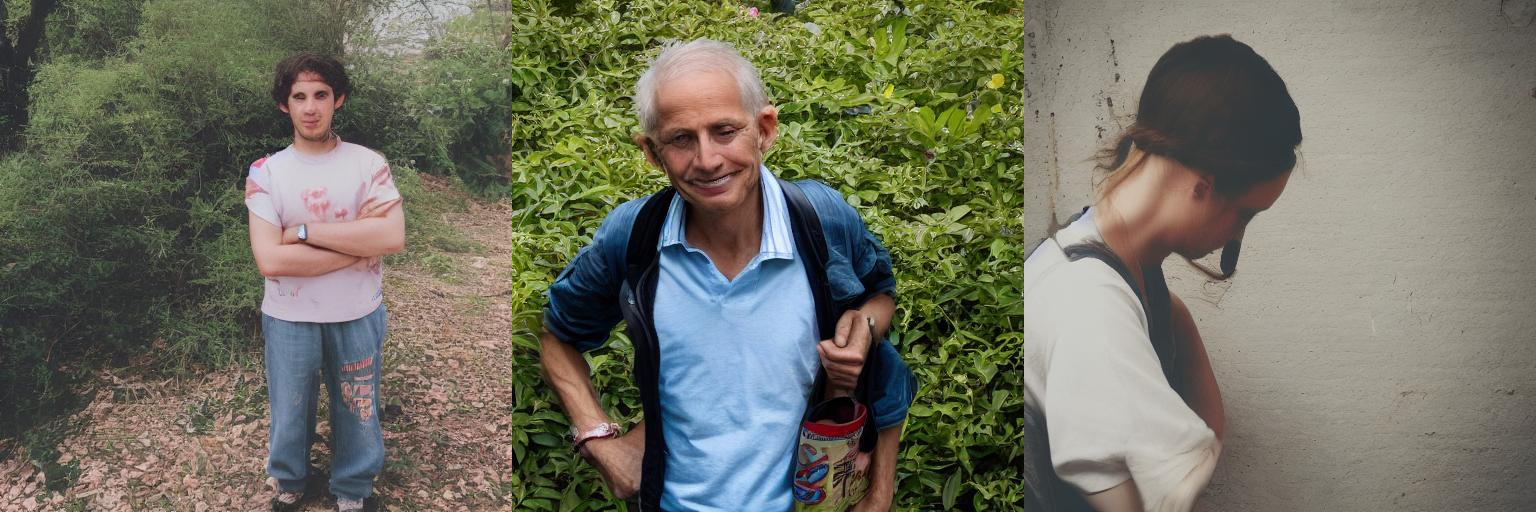

In [51]:
weights_folder = output_dir
# Filter out items that are not directories or cannot be converted to integers before sorting
folders = sorted([f for f in os.listdir(weights_folder) if os.path.isdir(os.path.join(weights_folder, f)) and f.isdigit() and f !="0"], key =lambda x: int(x))
imgs_test =[]

for folder in folders:
  folder_path = os.path.join(weights_folder, folder)
  image_folder = os.path.join(folder_path, "/content/dataset_dave") # Corrected path to sample images

  # Check if the samples directory exists and is a directory
  if os.path.isdir(image_folder):
      images = [f for f in os.listdir(image_folder) if os.path.isfile(os.path.join(image_folder, f))] # Filter for files
      images.sort() # Sort images within the folder for consistent order

      # Take the first few images if more than needed, or all if less than or equal to 3
      images_to_display = images[:3] # Take up to the first 3 images

      for i in images_to_display:
          img_path = os.path.join(image_folder, i)
          try:
              img = Image.open(img_path)
              imgs_test.append(img)
          except Exception as e:
              print(f"Error opening image {img_path}: {e}")
  else:
      print(f"Samples directory not found in {folder_path}")


# Display the images in a grid (assuming we have enough images for a 1x3 grid)
if len(imgs_test) >= 3:
    display(grid_img(imgs_test[:3], row=1, cols=3, scale=1))
elif len(imgs_test) > 0:
    print(f"Only {len(imgs_test)} sample images found. Cannot create a 1x3 grid.")
else:
    print("No sample images found in the specified directories.")

# Inferencing;(Tests)

In [44]:
import torch
from torch import autocast
from diffusers import StableDiffusionPipeline, DDIMScheduler
from IPython.display import display

In [45]:
model_path = weights_dir
print(model_path)

/content/stable_diffusion_weights/zwx/800


In [46]:
pipe = StableDiffusionPipeline.from_pretrained(model_path, torch_dtype=torch.float16).to("cuda")
pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config)
pipe.enable_xformers_memory_efficient_attention()
seed = 777


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


pipe = StableDiffusionPipeline.from_pretrained(model_path, torch_dtype=torch.float16).to("cuda"):
StableDiffusionPipeline.from_pretrained(model_path, ...): This is the core function call from the diffusers library that loads a pre-trained (or in this case, fine-tuned) Stable Diffusion model pipeline.
model_path: This variable (which you defined earlier as /content/stable_diffusion_weights/zwx/800) specifies the directory where your fine-tuned model weights are saved. The from_pretrained method knows how to load the various components (UNet, VAE, text encoder, etc.) from this directory.
torch_dtype=torch.float16: This argument tells PyTorch to load the model weights in half-precision (16-bit floating-point format). This is a common optimization for deep learning models on GPUs, as it significantly reduces memory usage and can speed up computation.
.to("cuda"): This part moves the entire pipeline model to your GPU (CUDA device). This is necessary to perform inference efficiently using the GPU's parallel processing capabilities.
pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config):
pipe.scheduler: Accesses the default scheduler that came with the loaded pipeline.
pipe.scheduler.config: Retrieves the configuration settings of the default scheduler.
DDIMScheduler.from_config(...): Creates a new DDIMScheduler instance using the configuration of the original scheduler. This replaces the pipeline's default scheduler with a DDIM scheduler, which is another popular and often faster sampling method for generating images with Stable Diffusion.
In essence, this cell loads your fine-tuned model weights into a Stable Diffusion pipeline object, optimizes it for GPU usage with half-precision, and sets up the DDIM scheduler for the image generation process. After this cell runs successfully, the pipe object is ready to be used for generating images based on text prompts.

In [55]:
prompt = "face potrait of zwx in the snow, realistic , hd, vivid , sunset "
negative_prompt = "bad anatomy, ugly, deformed, desfigured, distored face, poorly drawn hands, poorly drawn face , low definition, lowres, out of frae, low quality"
num_samples = 5
guidance_scale = 7.5
num_inference_steps = 30
height = 512
width = 512

seed = random.randint(0, 2147483647)
print(f"seed: {seed}")
generator = torch.Generator("cuda").manual_seed(seed)
with autocast("cuda"):
    images = pipe(
        prompt,
        height=height,
        width=width,
        negative_prompt=negative_prompt,
        num_images_per_prompt=num_samples,
        num_inference_steps=num_inference_steps,
        guidance_scale=guidance_scale,
        generator=generator,
    ).images


seed: 71178468


  0%|          | 0/30 [00:00<?, ?it/s]

In [56]:
for i, image in enumerate(images):
    display(image)
    image.save(f"output{i}.png")

Output hidden; open in https://colab.research.google.com to view.

# Saving the results


In [50]:
!mkdir results

In [57]:
from PIL import Image

if 'images' in locals() and isinstance(images, list) and len(images) > 0:
    # Check if the items in the list are PIL Images
    if all(isinstance(img, Image.Image) for img in images):
        for i, image in enumerate(images):
            image.save(f"results/output{i}.png")
        print(f"Successfully saved {len(images)} images to the 'results' directory.")
    else:
        print("Error: The 'images' variable does not contain PIL Image objects. Please ensure the inference cell ran successfully.")
else:
    print("Error: The 'images' variable is not available or is empty. Please run the inference cell first.")

Successfully saved 5 images to the 'results' directory.


In [63]:
! pip install nbstripout
! nbstripout --install

fatal: --local can only be used inside a git repository
Installation failed: not a git repository!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')